# Exloratory Data Analysis

In [217]:
# import necessary library
import numpy as np # for mathematical calculation
import pandas as pd # for dataframe manipulation 
import matplotlib.pyplot as plt # for visualisation
import seaborn as sns # for various visualisation

%matplotlib inline 

In [218]:
#import dataframe 

df = pd.read_csv("ipl.csv")
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [219]:
# about dataframe
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
mid               76014 non-null int64
date              76014 non-null object
venue             76014 non-null object
bat_team          76014 non-null object
bowl_team         76014 non-null object
batsman           76014 non-null object
bowler            76014 non-null object
runs              76014 non-null int64
wickets           76014 non-null int64
overs             76014 non-null float64
runs_last_5       76014 non-null int64
wickets_last_5    76014 non-null int64
striker           76014 non-null int64
non-striker       76014 non-null int64
total             76014 non-null int64
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


In [220]:
# different features
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [221]:
#seprate numerical and catagorical feature 
numerical = df.select_dtypes(np.number).columns.tolist()
print (numerical)

catagorical = df.select_dtypes('object').columns.tolist()
print (catagorical)



['mid', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker', 'non-striker', 'total']
['date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler']


# Feature engineering and Selection Process

In [222]:
# check is null or missing labels are in dataframe.
df.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [223]:
# Removing uncesssary feature 
remove_columns = [ 'batsman', 'bowler','mid',  'striker', 'non-striker','venue','date']
df.drop(labels=remove_columns,axis = 1, inplace  = True)


In [224]:
# unique team
df['bat_team'].unique()


array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [225]:
# select top 8 teams that are playing ipl now a days
playing_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
        'Sunrisers Hyderabad']
df = df[df['bat_team'].isin(playing_teams)&df['bowl_team'].isin(playing_teams)]

In [226]:
df.head()

,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [227]:
# remove first 5 overs from every match 
df = df[df['overs']>=5]
df['overs']

32        5.1
33        5.2
34        5.3
35        5.4
36        5.5
         ... 
75884    18.1
75885    18.2
75886    18.3
75887    18.4
75888    18.5
Name: overs, Length: 40108, dtype: float64

In [228]:
# # convert the column from date string to datetime object
# from datetime import datetime
# df['date'] = df['date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d') )


In [229]:
## handling catagorical variable 
 # one hot encoding
encoded_df = pd.get_dummies(df,columns=['bat_team','bowl_team'])

In [230]:
encoded_df.head()

,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,61,0,5.1,59,0,222,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
33,61,1,5.2,59,1,222,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
34,61,1,5.3,59,1,222,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
35,61,1,5.4,59,1,222,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
36,61,1,5.5,58,1,222,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [231]:
encoded_df.columns

Index(['runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'total',
       'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [232]:
df = encoded_df[[ 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 
       'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad','total']]
df.head()

,runs,wickets,runs_last_5,wickets_last_5,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,...,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,total
32,61,0,59,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,222
33,61,1,59,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,222
34,61,1,59,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,222
35,61,1,59,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,222
36,61,1,58,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,222


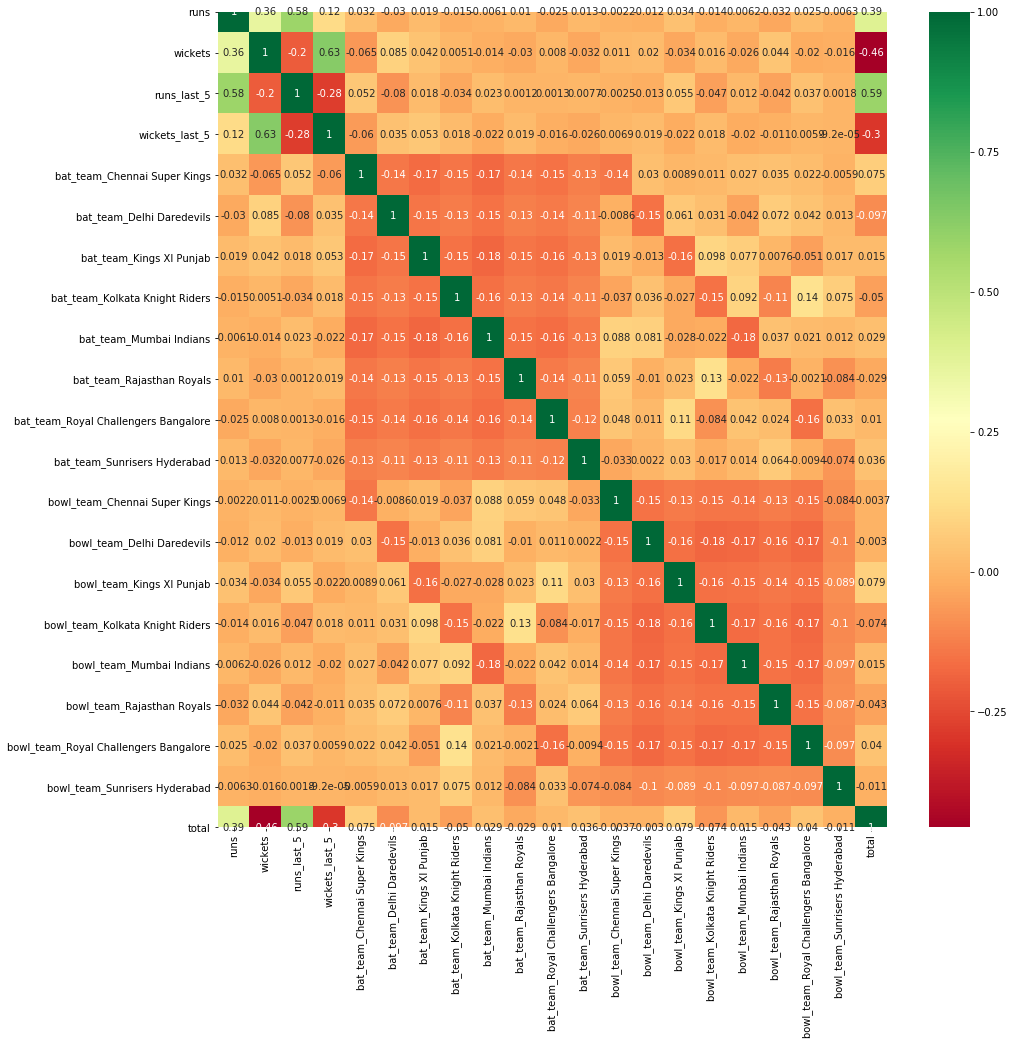

In [233]:
## to getting correlation of every feautres in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15) )
# ploting heat map for visualisation ..
m = sns.heatmap(df[top_corr_features].corr(),annot= True, cmap="RdYlGn")

In [234]:
# Split dataframe into train  and test 

from sklearn.model_selection import train_test_split
x = df.iloc[:,0:-1]  #independent columns
y = df.iloc[:,-1]    #target column i.e outcome

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = 42)

# Try different types of model


In [235]:
# linear Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [236]:
prediction = regressor.predict(x_test)

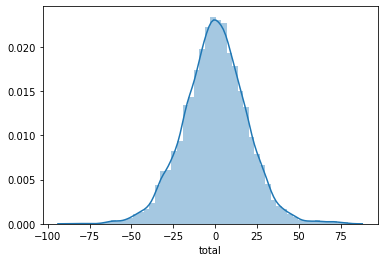

In [237]:
# visualize my model
sns.distplot(y_test-prediction)


In [238]:
from sklearn import metrics
print('MAE :',metrics.mean_absolute_error(y_test,prediction))

print('MSE :',metrics.mean_squared_error(y_test,prediction))

print('RMSE:' ,np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE : 14.613380274889634
MSE : 356.04794783759536
RMSE: 18.869232836487956


In [239]:
# rigde Regression
from sklearn.linear_model import Ridge
Ridge_regressor = Ridge()
Ridge_regressor.fit(x_train,y_train)


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [240]:
prediction = Ridge_regressor.predict(x_test)

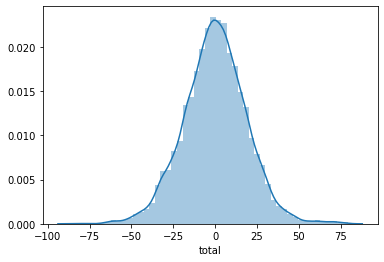

In [241]:
# visualize my model
sns.distplot(y_test-prediction)


In [242]:
from sklearn import metrics
print('MAE :',metrics.mean_absolute_error(y_test,prediction))

print('MSE :',metrics.mean_squared_error(y_test,prediction))

print('RMSE:' ,np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE : 14.613351586781462
MSE : 356.0478173913989
RMSE: 18.869229379903114


In [243]:
from sklearn.linear_model import Lasso
Lasso_regressor = Lasso()
Lasso_regressor.fit(x_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [244]:
prediction =Lasso_regressor.predict(x_test)

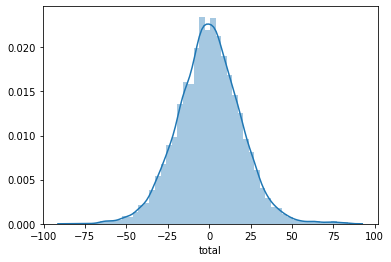

In [245]:
# visualize my model
sns.distplot(y_test-prediction)

In [246]:
from sklearn import metrics
print('MAE :',metrics.mean_absolute_error(y_test,prediction))

print('MSE :',metrics.mean_squared_error(y_test,prediction))

print('RMSE:' ,np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE : 14.838581372842267
MSE : 367.50612081007034
RMSE: 19.170449155146844


In [247]:
# for more finetuned our model we can used hyperparameter tunning .
# such as RandomsearchCV.........

In [248]:
# Creating the pickel file for the regressor
import pickle 
filename = 'IPL_Score_Prediction.pkl'
pickle.dump( Lasso_regressor,open(filename,'wb')) 